<a href="https://colab.research.google.com/github/eileendchen/AP-Research-Project/blob/main/AP_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect google drive with notebook 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image, ImageOps
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok
import streamlit as st
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from os.path import splitext,isfile,join
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from os import listdir,makedirs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
from keras.preprocessing import image
import cv2
import glob
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten

import random
import pickle
import keras
from keras.utils.np_utils import to_categorical
import tensorflow as tf 
from keras.models import model_from_json, load_model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
#make training datasets
file_list_train = []
class_list_train = []

DATADIR_train = "/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Train"

# All the categories you want your neural network to detect
CATEGORIES_train = ["Class0", "Class1"]

# The size of the images that your neural network will use
IMG_SIZE = 256

# Checking or all images in the data folder
for category in CATEGORIES_train :
	path = os.path.join(DATADIR_train, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

train_data = []

def create_train_data():
	for category in CATEGORIES_train:
		path = os.path.join(DATADIR_train, category)
		class_num = CATEGORIES_train.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				train_data.append([new_array, class_num])
			except Exception as e:
				pass

create_train_data()

random.shuffle(train_data)

X = [] #features
y = [] #labels

for features, label in train_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #

y = np.array(y)
Y = to_categorical(y , num_classes = 2)


In [ ]:
#make testing datasets
file_list_test = []
class_list_test = []

DATADIR_test = "/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test"

# All the categories you want your neural network to detect
CATEGORIES_test = ["Class0", "Class1"]

# The size of the images that your neural network will use
IMG_SIZE = 256

# Checking or all images in the data folder
for category in CATEGORIES_test :
	path = os.path.join(DATADIR_test, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

test_data = []

def create_test_data():
	for category in CATEGORIES_test :
		path = os.path.join(DATADIR_test, category)
		class_num = CATEGORIES_test.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				test_data.append([new_array, class_num])
			except Exception as e:
				pass

create_test_data()

random.shuffle(test_data)

X_test = [] #features
y_test = [] #labels

for features, label in test_data:
	X_test.append(features)
	y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #

y_test = np.array(y_test)
Y_test = to_categorical(y_test , num_classes = 2)


In [ ]:

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 1), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Train',
target_size = (256, 256),
batch_size = 32,
class_mode = 'binary',
color_mode = "grayscale"
)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test',
target_size = (256, 256),
batch_size = 32,
color_mode = "grayscale",
class_mode = 'binary')
history = classifier.fit(training_set, epochs = 12, validation_data = test_set)

# Part 3 - Making new predictions


2022-03-09 10:35:10.197846: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 140 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
Epoch 1/12
5/5 [==============================] - 13s 2s/step - loss: 2.1087 - accuracy: 0.4786 - val_loss: 0.8072 - val_accuracy: 0.3333
Epoch 2/12
5/5 [==============================] - 11s 2s/step - loss: 0.7762 - accuracy: 0.6071 - val_loss: 0.5398 - val_accuracy: 0.6667
Epoch 3/12
5/5 [==============================] - 14s 3s/step - loss: 0.6689 - accuracy: 0.5857 - val_loss: 0.4695 - val_accuracy: 0.7333
Epoch 4/12
5/5 [==============================] - 12s 2s/step - loss: 0.5485 - accuracy: 0.7357 - val_loss: 0.2967 - val_accuracy: 0.9111
Epoch 5/12
5/5 [==============================] - 11s 2s/step - loss: 0.4659 - accuracy: 0.7643 - val_loss: 0.2159 - val_accuracy: 0.8889
Epoch 6/12
5/5 [==============================] - 11s 2s/step - loss: 0.3873 - accuracy: 0.8214 - val_loss: 0.1718 - val_accuracy: 0.8889
Epoch 7/12
5/5 [==============================] - 11s 2s/step - loss: 0.4176 - accuracy: 0.

In [ ]:
loss, accuracy = classifier.evaluate(test_set)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

2/2 [==============================] - 1s 200ms/step - loss: 0.2532 - accuracy: 0.8889
Accuracy: 0.8888888955116272
Loss: 0.2532191872596741


In [ ]:
model = tf.keras.models.load_model('model.hdf5')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
Y_test = np.argmax(Y_test,axis = 1)
print(confusion_matrix(Y_test, y_pred))

OSError: ignored

In [ ]:

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
Y_test = np.argmax(Y_test,axis = 1)
print(confusion_matrix(Y_test, y_pred))

AxisError: ignored

In [ ]:
%%writefile app.py
st.write("""
         # CMV Retinitis Symptom Recognition
         """
         )
st.write("This is a simple image classification web app to predict rock-paper-scissor hand sign")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

def import_and_predict(image_data, model):
    
        size = (256,256)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = (cv2.resize(img, dsize=(256, 256),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = classifier.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, classifier)
    
    if np.argmax(prediction) == 0:
        st.write("Normal")
    elif np.argmax(prediction) == 1:
        st.write("Diseased")
    
    
    st.text("Probability (1: Diseased, 0: Regular)")
    st.write(prediction)

Writing app.py


In [ ]:
public_url = ngrok.connect(port='8501')
public_url

2022-02-26 21:46:35.443 INFO    pyngrok.ngrok: Opening tunnel named: http-80-eb24e64e-ebae-41c1-b038-880ae253edab


2022-02-26 21:46:36.941 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:36+0000 lvl=info msg="no configuration paths supplied"
2022-02-26 21:46:36.946 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:36+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-02-26 21:46:36.952 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:36+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-02-26 21:46:36.959 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:36+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2022-02-26 21:46:37.172 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2022-02-26 21:46:37.173 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg="client session established" obj=csess id=6db288afdede
2022-02-26 21:46:37.177 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg=start pg=/api/tunnel

<NgrokTunnel: "http://7d38-34-82-143-61.ngrok.io" -> "http://localhost:80">

2022-02-26 21:46:37.349 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-eb24e64e-ebae-41c1-b038-880ae253edab addr=http://localhost:80 url=https://7d38-34-82-143-61.ngrok.io
2022-02-26 21:46:37.353 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg=end pg=/api/tunnels id=05e39007714f6837 status=201 dur=152.962757ms
2022-02-26 21:46:37.358 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg=start pg="/api/tunnels/http-80-eb24e64e-ebae-41c1-b038-880ae253edab (http)" id=3ba61067b4b6b4ed
2022-02-26 21:46:37.362 INFO    pyngrok.process.ngrok: t=2022-02-26T21:46:37+0000 lvl=info msg=end pg="/api/tunnels/http-80-eb24e64e-ebae-41c1-b038-880ae253edab (http)" id=3ba61067b4b6b4ed status=200 dur=195.016µs


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test/Class1/img6.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'diseased'
else:
  prediction = 'not diseased'

print(prediction)

diseased


In [ ]:
target_names = ['normal', 'diseased']
print(classification_report(Y_test, y_pred, zero_division = 0, target_names = target_names))

              precision    recall  f1-score   support

      normal       0.67      1.00      0.80        30
    diseased       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.33      0.50      0.40        45
weighted avg       0.44      0.67      0.53        45



In [ ]:

y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


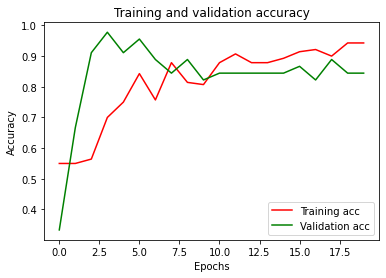

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(history.history.keys())
epochs = classifier.history.epoch
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


TypeError: ignored

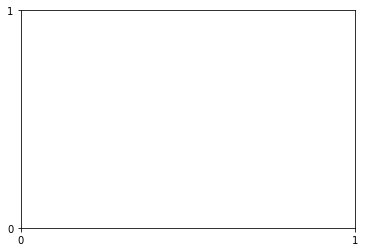

In [ ]:
y_pred=classifier.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

sns.heatmap(annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classifier.coef_)

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

probs = classifier.predict_proba(X_test)
plot = skplt.metrics.plot_roc(y_test, probs)
plt.title("ROC Curves - MLPClassifier")


Text(0.5, 15.0, 'Predicted label')

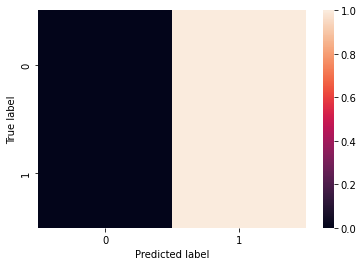

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

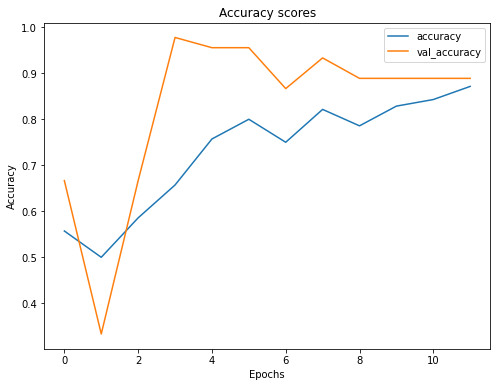

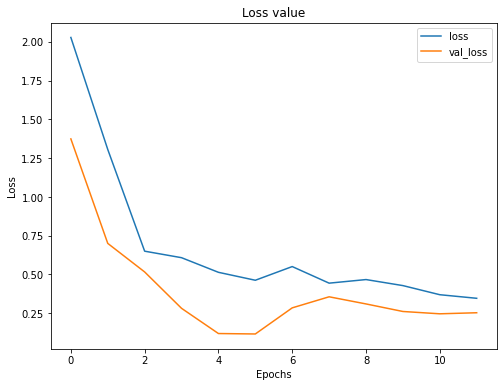

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
classifier.save("savedmodel.h5")

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))

[[ 0 30]
 [ 0 15]]


# New Section

In [ ]:
#changing pictures in folder
datagen = ImageDataGenerator(
          rotation_range = 10,
          shear_range=0.2,
          horizontal_flip=True,
          zoom_range=[0.9,0.9], 
          fill_mode='nearest')

for l in range(17,52):

  img = load_img('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/Class1/img{}.jpg'.format(l))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/Class1', save_prefix='newimg{}'.format(l), save_format='jpg'):
      i += 1
      if i > 0:
          break  # otherwise the generator would loop indefinitely

KeyboardInterrupt: ignored

In [ ]:


# new folder path (may need to alter for Windows OS)
# change path to your path
path = '/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/ResizedClass1' #the path where to save resized images
# create new folder

# loop over existing images and resize
# change path to your path
for filename in glob.glob('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/Class1/*.jpg'): #path of raw images
    img = Image.open(filename).resize((256,256))
    # save resized images to new folder with existing filename
    if img.mode in ("RGBA", "P"): img = img.convert("RGB")
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))

In [ ]:
# resizing a single image
img = Image.open('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Single Photo/Copy of img35.jpg')
if img.mode != 'RGB':
  img = img.convert('RGB')
new_image = img.resize((256,256))
new_image.save('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Single Photo/img35.jpg')
print(img.size)
print(new_image.size)
img.show()
new_image.show()

(643, 492)
(256, 256)


In [ ]:
#resizing folder of images
f = r'/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test/Class1'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    if img.mode != 'RGB':
      img = img.convert('RGB')
    img.save(f_img)

In [ ]:
# used to rename all pictures in folder 
folder = "/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/Class1" #folder that you want to change
for count, filename in enumerate(os.listdir(folder)):
  dst = f"img{str(count)}.jpg"
  src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
  dst =f"{folder}/{dst}"
         
   # rename() function will
        # rename all the files
  os.rename(src, dst)

In [ ]:
#make mask of black border
directory = r'drive/MyDrive/LGHS 2021-2022/AP Research/CMV Retinitis Images'
# load image as grayscale
img = cv2.imread('drive/MyDrive/LGHS 2021-2022/AP Research/CMV Retinitis Images/img6.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
a
# put mask into alpha channel of image
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('drive/MyDrive/LGHS 2021-2022/AP Research/CMV Retinitis Images/img6masked.jpg', result)

# display result, though it won't show transparency
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Changing regular pictures to grayscale
path = '/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test/Class0' # Source Folder
dstpath = '/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Test/ActualClass0' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        gray_image = cv2.cvtColor(os.path.join(path,image), cv2.COLOR_BGR2GRAY) # convert to greyscale
        cv2.imwrite(os.path.join(dstpath,fil),gray_image)
    except:
        print('{} is not converted')

Directory already exist, images will be written in same folder


In [ ]:

# used to rename all pictures in folder 
folder = "/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Practice Convert/Train/Class1" #folder that you want to change
for count, filename in enumerate(os.listdir(folder)):
  dst = f"img{str(count)}.jpg"
  src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
  dst =f"{folder}/{dst}"
         
   # rename() function will
        # rename all the files
  os.rename(src, dst)
  
im = Image.open("test.jpg")
left = int(im.size[0]/2-224/2)
upper = int(im.size[1]/2-100/2)
right = left +224
lower = upper + 100

im_cropped = im.crop((left, upper,right,lower))



In [ ]:
#changing one picture 

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Single Photo/Copy of img35.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/LGHS 2021-2022/AP Research/Pictures/Single Photo', save_prefix='img35', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely